# Homework 4

In this assignment, you will build and test a Neural Network model of product reviews using Python's Scikit-learn package.

The dataset is provided with the homework and is the same dataset that was provided with Homework 2 and 3. It contains reviews for six of the review topics used in the paper John Blitzer, Mark Dredze, and Fernando Pereira: Biographies, Bollywood, Boom-boxes and Blenders: Domain Adaptation for Sentiment Classification. In Proceedings of the 45th Annual Meeting of the Association of Computational Linguistics (ACL 2007). The data has been formatted so that there is one review per line, and the texts have been tokenized and normalized.

A line in the file is organized in columns as follows:

0: topic category label (books, camera, dvd, health, music, or software)<br>
1: sentiment category label (pos or neg)<br>
2: document identifier<br>
3 and on: the actual review

Here is an example of a line:

<i>health pos 691.txt smaller size did not fit me or my son . it would be nice if you could use perhaps a hat size to determine right size . standard size worked fine .</i>

IMPORTANT: Your submission must be a Jupyter Notebook (.ipynb) file that is organized into sections as in this notebook file. You should edit this file to insert your answers and submit the resulting file. You can insert cells as needed, however keep your code well-organized and easy to understand.

In [1]:
# you may insert your imports in this cell
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

import string
stopset = stopwords.words('english') + list(string.punctuation)

import warnings
warnings.filterwarnings('ignore')

## Part I - 5 Points

Write a function named <i>read_corpus</i> that takes a filename for the dataset and the position of the category label on each line and returns the reviews and labels as two separate lists. 

Invoke your function with the filename of the dataset provided with this assignment and <b>0</b> as the position of the category label (<b>topic</b>), save the results in variables, and then print out the folowing:
 
 (1) any two reviews and their corresponding labels (Note: the labels should be one of (books, camera, dvd, health, music, or software))<br>
 (2) number of reviews (reviews will be referred to as data in the rest of the assignment) <br> 
 (3) number of labels

In [2]:
# PART I: extract data and labels 
def read_corpus(filename, category_position):
    ## fill in your code below this line
    
    all_data = []
    all_labels = []
    with open(filename, encoding='utf8') as f:
        for line in f:
            tokens = line.strip().split()
            data = tokens[3:]
            label = tokens[category_position]
            all_data.append(' '.join(data))
            all_labels.append(label)
    
    
    
    return all_data, all_labels

In [55]:
# code for 
#(1) invoking the read_corpus function
#(2) generating output for  
    #(i) any two reviews and their corresponding labels
    #(ii) number of reviews
    #(iii) number of labels

### fill your code below this line and run this cell to SHOW YOUR OUTPUT
# code for 
#(1) invoking the read_corpus function
path = "../data/HW4_data/all_reviews.txt"
all_data, all_labels = read_corpus(path, category_position=0)
print("REVIEW #0: ")
print("LABEL: ", all_labels[0])
print("DATA: ", all_data[0])

print("REVIEW #2: ")
print("LABEL: ", all_labels[2])
print("DATA: ", all_data[2])


print("# REVIEWS IN CORPUS:", len(all_data))
print("# LABELS IN CORPUS ", len((all_labels)))
print("# UNIQUE LABELS IN CORPUS: ", len(set(all_labels)))

REVIEW #0: 
LABEL:  music
DATA:  i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things .
REVIEW #2: 
LABEL:  books
DATA:  i have introduced many of my ell , high school students to lois lowery and the depth of her characters . she i

## Part II - 10 Points

(1) Use the <i>train_test_split</i> utility in Scikit-learn's <i>model_selection</i>  library to split the data and labels into 4 arrays (based on a 80/20 split): X_train, X_test, y_train, y_test. 

X_train should contain the data for training, and X_test should contain the data for testing. y_train should contain the labels for training, and y_test should contain the labels for testing. 

(2) Print out the len of X_train and y_train.

(3) Using the "assert" statement in Python, confirm that the number of samples in the training data and training labels match. Additionally, confirm that the number of samples in the test data and test labels match. Assert is used as follows: 
assert(cond). Try executing the following two statements to see how this works.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, train_size=.8)
print('Length of X_train:', len(X_train)); print('Length of y_train:', len(y_train))

Length of X_train: 9531
Length of y_train: 9531


In [41]:
len_xtrain = len(X_train)
len_ytrain = len(y_train)
err_msg = f"The number of samples in xtrain: {len_xtrain} and y_train: {len_ytrain} do not match"

assert len_xtrain==len_ytrain, err_msg

## Part III - 20 points

Using the MLPClassifier module from Scikit-learn package, build a neural network model on the training data and predict the labels for the test_data. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html for details on this module. 

The inputs to the model should be a TF-IDF representation of the training data. You can follow the framework used in Homework 2 to achieve this. 

Use a single hidden layer in the neural network architecture with either 100 or 50 units. 

Use "verbose=true" to see the training results in each epoch. 

In [43]:
#run this cell to see all the options for MLPClassifier
model = make_pipeline(TfidfVectorizer(), MLPClassifier(verbose=True))
model.fit(X_train, y_train)

Iteration 1, loss = 1.59979838
Iteration 2, loss = 0.98206853
Iteration 3, loss = 0.48937226
Iteration 4, loss = 0.26304904
Iteration 5, loss = 0.16145285
Iteration 6, loss = 0.10838583
Iteration 7, loss = 0.07712138
Iteration 8, loss = 0.05716411
Iteration 9, loss = 0.04385806
Iteration 10, loss = 0.03461640
Iteration 11, loss = 0.02808127
Iteration 12, loss = 0.02319299
Iteration 13, loss = 0.01953262
Iteration 14, loss = 0.01672203
Iteration 15, loss = 0.01451084
Iteration 16, loss = 0.01275989
Iteration 17, loss = 0.01139385
Iteration 18, loss = 0.01020469
Iteration 19, loss = 0.00924599
Iteration 20, loss = 0.00846844
Iteration 21, loss = 0.00778606
Iteration 22, loss = 0.00720943
Iteration 23, loss = 0.00672193
Iteration 24, loss = 0.00629567
Iteration 25, loss = 0.00592726
Iteration 26, loss = 0.00560256
Iteration 27, loss = 0.00531584
Iteration 28, loss = 0.00506454
Iteration 29, loss = 0.00483576
Iteration 30, loss = 0.00463395
Iteration 31, loss = 0.00445240
Iteration 32, los

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rat

In [45]:
pred_labels = model.predict(X_test)

## Part IV - 10 Points

(1) Generate and display the confusion matrix of the predictions of your model on the test data as a heatmap plot. 

(2) Compute and display the microaveraged and macroaveraged F1 scores for the predictions of your model on the test data.

Text(-3.0000000000000018, 0.5, 'predicted label')

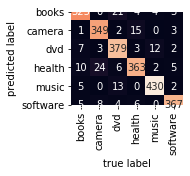

In [46]:
mat = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(2,2))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.xlabel('true label')
plt.ylabel('predicted label')

In [49]:
print('Microaveraged F1 score:', f1_score(y_test, pred_labels, average='micro'))
print('Macroaveraged F1 score:', f1_score(y_test, pred_labels, average='macro'))

Microaveraged F1 score: 0.9286613512379354
Macroaveraged F1 score: 0.9280340694873424


## Part V - 20 Points

Repeat Parts III & IV for 2 neural network architectures different from the one used in Part III. You can vary the number of hidden layers and/or number of hidden units in a layer. Clearly document what kind of architecture you are using through comments. E.g. # 2 hidden layers with 50 units in each layer. Additionally, in one of the architectures, set the learning rate to a value different from the default value. You may also change the default values of other parameters. 

In [52]:
# 3 hidden layers with 50 neurons in the first, 25 in the second, and 50 in the last and invscaling learning rate
#learning_rate = 'invscaling'

model2 = make_pipeline(TfidfVectorizer(), MLPClassifier(verbose=True,
                                                        hidden_layer_sizes=(50,25,50),
                                                       learning_rate='invscaling'))
model2.fit(X_train, y_train)

Iteration 1, loss = 1.70434053
Iteration 2, loss = 1.10904156
Iteration 3, loss = 0.38217089
Iteration 4, loss = 0.11639893
Iteration 5, loss = 0.04623477
Iteration 6, loss = 0.02245701
Iteration 7, loss = 0.01253229
Iteration 8, loss = 0.00788985
Iteration 9, loss = 0.00545992
Iteration 10, loss = 0.00402042
Iteration 11, loss = 0.00312736
Iteration 12, loss = 0.00254530
Iteration 13, loss = 0.00212712
Iteration 14, loss = 0.00182961
Iteration 15, loss = 0.00158721
Iteration 16, loss = 0.00137336
Iteration 17, loss = 0.00121416
Iteration 18, loss = 0.00109255
Iteration 19, loss = 0.00100171
Iteration 20, loss = 0.00092753
Iteration 21, loss = 0.00086706
Iteration 22, loss = 0.00081588
Iteration 23, loss = 0.00077295
Iteration 24, loss = 0.00073652
Iteration 25, loss = 0.00070619
Iteration 26, loss = 0.00067945
Iteration 27, loss = 0.00065618
Iteration 28, loss = 0.00063624
Iteration 29, loss = 0.00061821
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(50, 25, 50),
                               learning_rate='invscaling',
                               lear

Text(-3.0000000000000018, 0.5, 'predicted label')

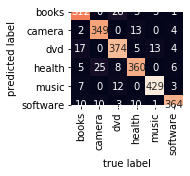

In [53]:
pred_labels2 = model2.predict(X_test)
mat2 = confusion_matrix(y_test, pred_labels2)
plt.figure(figsize=(2,2))

sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.xlabel('true label')
plt.ylabel('predicted label')

In [54]:
print('Microaveraged F1 score for new model:', f1_score(y_test, pred_labels2, average='micro'))
print('Macroaveraged F1 score for new model:', f1_score(y_test, pred_labels2, average='macro'))

Microaveraged F1 score for new model: 0.9181703734788083
Macroaveraged F1 score for new model: 0.9171782152966381


## Part VI - 25 Points

Repeat Parts III & IV with word embeddings as input to the model instead of TF_IDF scores. You will have to change the set up of your experiment to do this. 

You may use the code below to build an input matrix of embedding vectors. calc_doc_embedding is a function from Homework 3.

X_train_embed = np.vstack([calc_doc_embedding(doc, wv, 100, OOV_embed) for doc in X_train])

What do you notice about training the model with embeddings? Can you easily scale to larger architectures with embeddings as compared to Part III? Describe your observations in Part VIII. 

Try to scale to a large architecture (3-4 layers) in this part of the assignment. You need to show your results for 1 architecture only. 

In [56]:
glove_file = datapath('/Users/yanivbronshtein/Coding/Rutgers/NLP_Rutgers_Repo/data/HW4_data/glove.6B.100d.txt')
word2vec_text_file = get_tmpfile("glove.6B.100d.txt")
glove2word2vec(glove_file, word2vec_text_file)

(400001, 100)

In [57]:
wv = KeyedVectors.load_word2vec_format(word2vec_text_file)

In [59]:
def calc_doc_embedding(doc, embeddings, embed_size, OOV_embed):
    word_count = 0
    doc_embed = np.zeros(embed_size, dtype=float)
    
    for word in doc.split():
        if word not in stopset:
            if word in embeddings:
                word_embedding = embeddings[word]                
            elif word in OOV_embed:
                word_embedding = OOV_embed[word]                
            else:
                word_embedding = np.random.random(embed_size)
                OOV_embed[word] = word_embedding
                
            doc_embed += word_embedding
            word_count += 1
            
    doc_embed /= word_count
    return doc_embed

In [60]:
OOV_embed = {}
X_train_embed = np.vstack([calc_doc_embedding(doc, wv, 100, OOV_embed) for doc in X_train])
X_test_embed = np.vstack([calc_doc_embedding(doc, wv, 100, OOV_embed) for doc in X_test])

In [61]:
model3 = MLPClassifier(verbose=True) # 1 hidden layer with 100 units
model3.fit(X_train_embed, y_train)


Iteration 1, loss = 1.47299969
Iteration 2, loss = 0.90143784
Iteration 3, loss = 0.63986089
Iteration 4, loss = 0.52705400
Iteration 5, loss = 0.47094359
Iteration 6, loss = 0.43582511
Iteration 7, loss = 0.41537712
Iteration 8, loss = 0.39871411
Iteration 9, loss = 0.38861706
Iteration 10, loss = 0.37856380
Iteration 11, loss = 0.37305563
Iteration 12, loss = 0.36686066
Iteration 13, loss = 0.36085789
Iteration 14, loss = 0.35608485
Iteration 15, loss = 0.35079016
Iteration 16, loss = 0.34776993
Iteration 17, loss = 0.34553592
Iteration 18, loss = 0.34110899
Iteration 19, loss = 0.33887475
Iteration 20, loss = 0.33750646
Iteration 21, loss = 0.33377555
Iteration 22, loss = 0.32998053
Iteration 23, loss = 0.33054432
Iteration 24, loss = 0.32620365
Iteration 25, loss = 0.32507508
Iteration 26, loss = 0.32338190
Iteration 27, loss = 0.32136909
Iteration 28, loss = 0.31991274
Iteration 29, loss = 0.31700284
Iteration 30, loss = 0.31559167
Iteration 31, loss = 0.31251006
Iteration 32, los

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [64]:
pred_labels3 = model3.predict(X_test_embed)

Text(-3.0000000000000018, 0.5, 'predicted label')

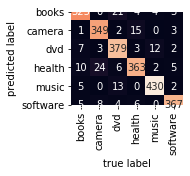

In [65]:
mat3 = confusion_matrix(y_test, pred_labels3)
plt.figure(figsize=(2,2))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.xlabel('true label')
plt.ylabel('predicted label')

In [66]:
print('Microaveraged F1 score for third model using word embeddings:', f1_score(y_test, pred_labels3, average='micro'))
print('Macroaveraged F1 score for third model using word embeddings::', f1_score(y_test, pred_labels3, average='macro'))

Microaveraged F1 score for third model using word embeddings: 0.8913134704154427
Macroaveraged F1 score for third model using word embeddings:: 0.8901698190102388


In [67]:
#Network with 4 hidden layers: 150 in first hidden, 100 in the next 3, and 150 in the last hidden layer
model4 = MLPClassifier(verbose=True, hidden_layer_sizes=(150,100,100,150)) # 1 hidden layer with 100 units
model4.fit(X_train_embed, y_train)

Iteration 1, loss = 1.17842317
Iteration 2, loss = 0.48392061
Iteration 3, loss = 0.40469536
Iteration 4, loss = 0.36857154
Iteration 5, loss = 0.34980336
Iteration 6, loss = 0.34390229
Iteration 7, loss = 0.34345972
Iteration 8, loss = 0.32298063
Iteration 9, loss = 0.31072979
Iteration 10, loss = 0.30852660
Iteration 11, loss = 0.30936505
Iteration 12, loss = 0.29009161
Iteration 13, loss = 0.28059565
Iteration 14, loss = 0.28327058
Iteration 15, loss = 0.26790010
Iteration 16, loss = 0.25651981
Iteration 17, loss = 0.25443526
Iteration 18, loss = 0.24661034
Iteration 19, loss = 0.23775478
Iteration 20, loss = 0.23555579
Iteration 21, loss = 0.22183431
Iteration 22, loss = 0.22512034
Iteration 23, loss = 0.20887339
Iteration 24, loss = 0.20286370
Iteration 25, loss = 0.19944056
Iteration 26, loss = 0.19071532
Iteration 27, loss = 0.18321493
Iteration 28, loss = 0.16681465
Iteration 29, loss = 0.17136119
Iteration 30, loss = 0.16534914
Iteration 31, loss = 0.16418167
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 100, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

Text(-3.0000000000000018, 0.5, 'predicted label')

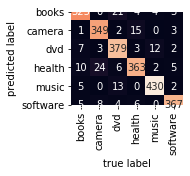

In [68]:
pred_labels4 = model4.predict(X_test_embed)
mat4 = confusion_matrix(y_test, pred_labels4)
plt.figure(figsize=(2,2))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.xlabel('true label')
plt.ylabel('predicted label')

In [69]:
print('Microaveraged F1 score for 4th model with word embeddings:', f1_score(y_test, pred_labels4, average='micro'))
print('Macroaveraged F1 score for 4th model with word embeddings::', f1_score(y_test, pred_labels4, average='macro'))

Microaveraged F1 score for 4th model with word embeddings: 0.8850188837599664
Macroaveraged F1 score for 4th model with word embeddings:: 0.8840697507925445


## Part VII - Points 5

Print out the topic predictions of the model on 5 reviews of your own such as "This is a great movie to watch". You can use the <i>predict</i> function of your model as in <i>model.predict(input)</i>. Make sure that the input is in the right format (as expected by the model).

In [70]:
r1 = 'This is best movie of all time'
r2 = 'The acting in this movie was terrible'
r3 = 'The actors in this movie are A-list'
r4 = 'This movie is extremely dull and boring'
r5 = 'The soundtrack in this movie was legendary'

all_reviews = [r1,r2,r3,r4]

In [72]:
new_X_embed = np.vstack([calc_doc_embedding(doc, wv, 100, OOV_embed) for doc in all_reviews])
model5 = MLPClassifier(hidden_layer_sizes=(150,100,100,150))
model5.fit(X_train_embed, y_train).predict(new_X_embed)
pred_labels5 = model5.predict(new_X_embed)
pred_labels5

array(['dvd', 'dvd', 'dvd', 'dvd'], dtype='<U8')

## Part VIII - Points 5

Write 10-20 lines describing your observations for the experiments in this assignment. 

The model trained with embeddings is a lot faster than with tf-idf.<br>
However, it seems there are many more iterations because more steps were needed to reduce loss.<br>
I successfully scaled to 4 layers with a lot more neurons in each layer.<br>
The biggest disadvantage is the lower F1-scores. With tf-idf, the f1 scores were over 0.91 while for word embeddings, they were under 0.9<br>
Model 4 had the worst performance<br>